# Import Libraries and Data Files

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
import gc

In [189]:
sns.set_style('whitegrid')

In [190]:
from plotly import __version__
# print(__version__)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()

In [191]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
submit_test = pd.read_csv('submit_test.csv')

# Fields (欄位說明)

- 羅馬數字：表示「類別」，有Ⅰ、Ⅱ、Ⅲ、Ⅳ、Ⅴ、Ⅵ、Ⅶ、Ⅷ、Ⅸ、Ⅹ、ⅩⅠ、ⅩⅡ、ⅩⅢ、ⅩⅣ。(下方僅以Ⅱ示例，其餘自行類推。)
- 阿拉伯數字：表示「公里」，有10、50、100、250、500、1000、5000、10000。(下方僅以50示例，其餘自行類推。)
- 點位數：表示「建物數量」。因此，Ⅱ類別於該屋方圓50公尺內點位數 = 600，則該屋方圓50公尺內有600間Ⅱ類別的建築。
### ※欄位名稱說明

Field  | Explanation | Field | Explanation | Field  | Explanation
------ | :---------  | :---  | :---------- | :----- | :----------
**building_id** | 建築編號 | **land_area** | 土地面積(經過神秘轉換) | **jobschool_rate** | 所在縣市高中教育程度人口占比
**building_material**| 建材 | **building_area** | 建物面積(經過神秘轉換)| **highschool_rate** | 所在縣市專科學校教育程度人口占比
**city** | 縣市 | **town** | 鄉鎮市區 | **junior_rate** | 所在縣市國中教育程度人口占比
**txn_dt**| 交易日期(距某一特定天之天數差)| **lat**| 	建物緯度(經過神秘轉換)| **elementary_rate** | 所在縣市國小教育程度人口占比
**total_floor**| 總樓層|	**lon**| 建物經度(經過神秘轉換) | **born_rate** | 所在縣市出生率
**building_type** | 建築物型態 | **village_income_median** | 所在里年收入中位數 | **death_rate** | 所在縣市死亡率
**building_use**| 建物用途 | **town_population** | 所在鄉鎮市區人口數 | **marriage_rate** | 所在縣市結婚率
**building_complete_dt** | 建物完成日期(距某一特定天之天數差) | **town_area**| 所在鄉鎮市區面積 | **divorce_rate** | 所在縣市離婚率
**parking_way** | 車位停放方式| **town_population_density** | 所在鄉鎮市區人口密度 | **village**| 村里
**parking_area** | 車位面積(經過神秘轉換) | **doc_rate** | 所在縣市博士教育程度人口占比 | **N_50**| 該屋方圓50公尺內類別種數
**parking_price** | 車位價格(經過神秘轉換) |**master_rate** | 所在縣市碩士教育程度人口占比 | **Ⅱ_50** | Ⅱ類別於該屋方圓50公尺內點位數
**txn_floor**| 交易樓層 | **bachelor_rate**| 所在縣市大學教育程度人口占比	| **Ⅱ\_index_50** | 該屋方圓50公尺內有無Ⅱ類別
 空 | 空 | **total_price** | 總價(經過神秘轉換) | **Ⅱ_MIN** | 該屋與最近Ⅱ類別的距離

In [192]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 235 entries, building_id to total_price
dtypes: float64(37), int64(197), object(1)
memory usage: 107.6+ MB


# Data Cleaning

## 1. Handle Missing Values

In [193]:
print('\033[1m' + '   train:' + '\033[0m')
print(train.isnull().sum().sort_values(ascending=False).head())
print('\n   ' + '\033[1m' + 'test:' + '\033[0m')
print(test.isnull().sum().sort_values(ascending=False).head())

   train:
parking_area             56897
parking_price            46065
txn_floor                15902
village_income_median     1142
total_price                  0
dtype: int64

   test:
parking_area             9500
parking_price            7710
txn_floor                2639
village_income_median     184
XIV_MIN                     0
dtype: int64


#### 1-a: Drop parking_area and parking_price for having too many missing values

In [194]:
train.drop(columns=['parking_area','parking_price'],inplace=True)

#### 1-b: Inspect column: txn_floor

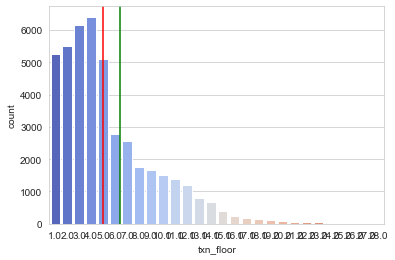

In [195]:
sns.countplot(train['txn_floor'],palette='coolwarm')
plt.axvline(x=train['txn_floor'].median(),c='r')
plt.axvline(x=train['txn_floor'].mean(),c='g')

In [196]:
train['txn_floor'].describe()

count    44098.000000
mean         5.389269
std          3.944618
min          1.000000
25%          3.000000
50%          4.000000
75%          7.000000
max         28.000000
Name: txn_floor, dtype: float64

#### 1-b-1: From below, we can infer that those without txn_floor  are villas, so there's no specific floor bought.

In [197]:
floors = train[['txn_floor','total_floor']]
floors[floors['txn_floor'].isnull()]

,txn_floor,total_floor
4,NaN,2
10,NaN,2
11,NaN,5
15,NaN,4
21,NaN,2
22,NaN,3
28,NaN,4
35,NaN,4
39,NaN,2
41,NaN,5


In [198]:
print('The MAX of total_floor above is ',floors[floors['txn_floor'].isnull()]['total_floor'].max(),'.',sep='')
print('The MIN of total_floor above is ',floors[floors['txn_floor'].isnull()]['total_floor'].min(),'.',sep='')

The MAX of total_floor above is 5.
The MIN of total_floor above is 1.


### NOTE: At the end of Data Cleaning, we will ... 
* Save all villas to a new variable (to be dealt with separately later)
* Drop rows with null values (including all villas)

In [199]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 233 entries, building_id to total_price
dtypes: float64(35), int64(197), object(1)
memory usage: 106.7+ MB


### Quick Note: Only 'lat' has negative values

In [200]:
# Only lat has negative values
is_neg = train.drop(columns=['building_id','total_price']).applymap(lambda flag: True if flag < 0 else False)
is_neg.sum().sort_values(ascending=False).head(3)

lat               60000
XIV_MIN               0
III_index_1000        0
dtype: int64

## 2. Categorical Columns:

In [201]:
def show_unique(col_name,table):
    print(col_name,'(',table[col_name].nunique(),'): ', sep='',end='')
    cpy = table[col_name].copy()  # deep copy
    for item in cpy.sort_values().unique():
        print(item, end=', ')
    del cpy
    print()
    
def show_nunique(col_name,table):
    print(col_name,'(',table[col_name].nunique(),'): ', sep='',end='')
    print('\tmax: ',table[col_name].max(),'\tmin: ',table[col_name].min() )

In [202]:
# The most are nominal categorical attributes
show_unique('building_material',train)
show_unique('city',train)
# show_unique('total_floor',train) # Ordinal
show_unique('building_type',train)
show_unique('building_use',train)
show_unique('parking_way',train)
# show_nunique('txn_floor',train) # Ordinal
show_nunique('town',train)
show_nunique('village',train)

building_material(9): 1, 3, 4, 5, 7, 8, 9, 10, 11, 
city(11): 3, 5, 6, 7, 9, 10, 12, 13, 14, 17, 21, 
building_type(5): 0, 1, 2, 3, 4, 
building_use(10): 0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 
parking_way(3): 0, 1, 2, 
town(213): 	max:  346 	min:  0
village(2899): 	max:  3377 	min:  0


In [203]:
building_material_dum = pd.get_dummies(train['building_material'],drop_first=True,prefix='building_material')
city_dum = pd.get_dummies(train['city'],drop_first=True,prefix='city')
building_type_dum = pd.get_dummies(train['building_type'],drop_first=True,prefix='building_type')
building_use_dum = pd.get_dummies(train['building_use'],drop_first=True,prefix='building_use')
parking_way_dum = pd.get_dummies(train['parking_way'],drop_first=True,prefix='parking_way')
town_dum = pd.get_dummies(train['town'],drop_first=True,prefix='town')
village_dum = pd.get_dummies(train['village'],drop_first=True,prefix='village')

In [204]:
categorical_feat = pd.concat([building_material_dum, city_dum, building_type_dum, building_use_dum,
                              parking_way_dum, town_dum, village_dum, train['total_price'] ], axis=1)

In [205]:
categorical_feat

,building_material_3,building_material_4,building_material_5,building_material_7,building_material_8,building_material_9,building_material_10,building_material_11,city_5,city_6,...,village_3368,village_3369,village_3371,village_3372,village_3373,village_3374,village_3375,village_3376,village_3377,total_price
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.476038e+05
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.321452e+06
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.570885e+06
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.421501e+07
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.627120e+05
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.964520e+05
6,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.510296e+06
7,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.678426e+06
8,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.870214e+05
9,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.181540e+07


In [206]:
train.drop(columns=['building_material','city','building_type','building_use','parking_way','town','village'],inplace=True)

In [207]:
train = pd.concat([train,building_material_dum, city_dum, building_type_dum, building_use_dum,parking_way_dum, town_dum, village_dum], axis=1)

In [208]:
train

,building_id,txn_dt,total_floor,building_complete_dt,txn_floor,land_area,building_area,lat,lon,village_income_median,...,village_3367,village_3368,village_3369,village_3371,village_3372,village_3373,village_3374,village_3375,village_3376,village_3377
0,e3mMIMR3JJqCaXz1,18674,4,6271,3.0,18.144460,3.418175,-39.14,117.08,572.0,...,0,0,0,0,0,0,0,0,0,0
1,LgwzgklNvy4QCtq5,18800,5,7885,5.0,11.387227,4.041309,-37.66,119.28,550.0,...,0,0,0,0,0,0,0,0,0,0
2,ucIR2NLLsC3T650L,19289,4,6028,1.0,21.426802,5.584279,-37.67,119.29,625.0,...,0,0,0,0,0,0,0,0,0,0
3,jre1pJhcQj91Kdky,20385,24,18325,13.0,11.387227,13.563031,-39.13,117.09,950.0,...,0,0,0,0,0,0,0,0,0,0
4,rQpYpY9nRG7X5mmr,20657,2,6880,NaN,61.306524,4.688108,-39.24,117.19,536.0,...,0,0,0,0,0,0,0,0,0,0
5,HmW2MkrwafmceWAH,18394,5,6576,4.0,14.803422,3.623131,-39.14,117.09,561.0,...,0,0,0,0,0,0,0,0,0,0
6,ITYyim3zx6DQyCoF,20474,15,16559,8.0,11.387227,7.726227,-37.69,119.27,716.0,...,0,0,0,0,0,0,0,0,0,0
7,KFrxqaWZaLynrOae,18185,8,11934,4.0,11.387227,7.974018,-38.05,118.17,618.0,...,0,0,0,0,0,0,0,0,0,0
8,ZiK0gY7A0BvwZ8OV,18794,5,7640,1.0,13.106100,4.041309,-39.19,117.08,513.0,...,0,0,0,0,0,0,0,0,0,0
9,QnytA7FbgaVxIDuP,19927,10,9863,2.0,11.387227,7.480303,-37.67,119.32,604.0,...,0,0,0,0,0,0,0,0,0,0


## 3. Target Column: total_price

In [209]:
from scipy.stats import norm

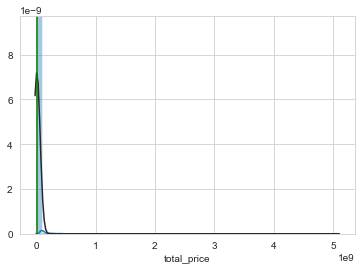

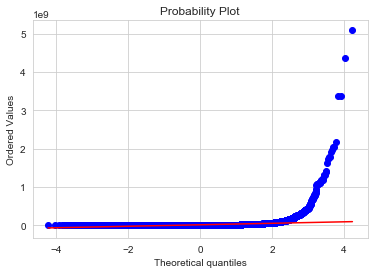

In [210]:
sns.distplot(train['total_price'],fit=norm)
plt.axvline(train['total_price'].mean(),c='g')
# Extremely right-skewed!!
fig = plt.figure()
res = stats.probplot(train['total_price'], plot=plt)

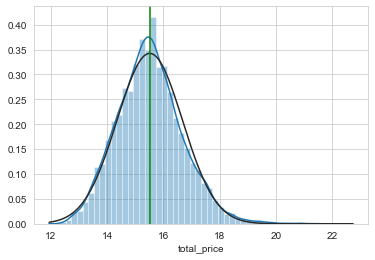

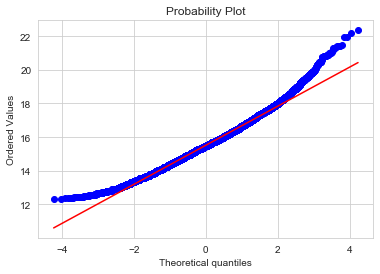

In [211]:
# Take the log of train['total_price']
sns.distplot(np.log(train['total_price']),fit=norm)
plt.axvline(np.log(train['total_price']).mean(),c='g')
fig = plt.figure()
res = stats.probplot(np.log(train['total_price']), plot=plt)

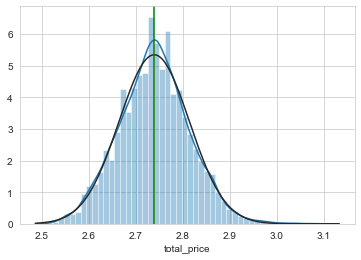

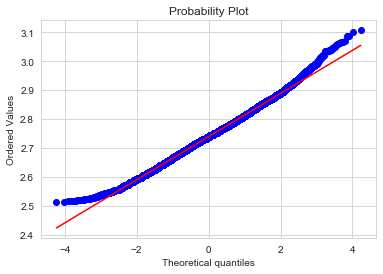

In [212]:
# Take the log of train['total_price'] AGAIN!!
sns.distplot(np.log(np.log(train['total_price'])),fit=norm)
plt.axvline(np.log(np.log(train['total_price'])).mean(),c='g')
fig = plt.figure()
res = stats.probplot(np.log(np.log(train['total_price'])), plot=plt)

### We now have a much better fit!! Let's take the log of train['total_price'] twice!

In [213]:
train['log(log(total_price))'] = np.log(np.log(train['total_price']))

In [214]:
train.head(2)

,building_id,txn_dt,total_floor,building_complete_dt,txn_floor,land_area,building_area,lat,lon,village_income_median,...,village_3368,village_3369,village_3371,village_3372,village_3373,village_3374,village_3375,village_3376,village_3377,log(log(total_price))
0,e3mMIMR3JJqCaXz1,18674,4,6271,3.0,18.144460,3.418175,-39.14,117.08,572.0,...,0,0,0,0,0,0,0,0,0,2.593838
1,LgwzgklNvy4QCtq5,18800,5,7885,5.0,11.387227,4.041309,-37.66,119.28,550.0,...,0,0,0,0,0,0,0,0,0,2.709110


In [215]:
train.drop(columns='total_price',inplace=True)
train.head(2)

,building_id,txn_dt,total_floor,building_complete_dt,txn_floor,land_area,building_area,lat,lon,village_income_median,...,village_3368,village_3369,village_3371,village_3372,village_3373,village_3374,village_3375,village_3376,village_3377,log(log(total_price))
0,e3mMIMR3JJqCaXz1,18674,4,6271,3.0,18.144460,3.418175,-39.14,117.08,572.0,...,0,0,0,0,0,0,0,0,0,2.593838
1,LgwzgklNvy4QCtq5,18800,5,7885,5.0,11.387227,4.041309,-37.66,119.28,550.0,...,0,0,0,0,0,0,0,0,0,2.709110


## 4. Do the SAME with "test" data:

In [216]:
# drop columns with too many missing values
test.drop(columns=['parking_area','parking_price'],inplace=True)

In [217]:
# Categorical Columns
building_material_dum_test = pd.get_dummies(test['building_material'],drop_first=True,prefix='building_material')
city_dum_test = pd.get_dummies(test['city'],drop_first=True,prefix='city')
building_type_dum_test = pd.get_dummies(test['building_type'],drop_first=True,prefix='building_type')
building_use_dum_test = pd.get_dummies(test['building_use'],drop_first=True,prefix='building_use')
parking_way_dum_test = pd.get_dummies(test['parking_way'],drop_first=True,prefix='parking_way')
town_dum_test = pd.get_dummies(test['town'],drop_first=True,prefix='town')
village_dum_test = pd.get_dummies(test['village'],drop_first=True,prefix='village')

In [218]:
categorical_feat_test = pd.concat([building_material_dum_test, city_dum_test, building_type_dum_test, building_use_dum_test,
                              parking_way_dum_test, town_dum_test, village_dum_test], axis=1)

In [219]:
test.drop(columns=['building_material','city','building_type','building_use','parking_way','town','village'],inplace=True)

In [220]:
test = pd.concat([test,building_material_dum_test, city_dum_test, building_type_dum_test, building_use_dum_test,
                  parking_way_dum_test, town_dum_test, village_dum_test], axis=1)

In [221]:
test

,building_id,txn_dt,total_floor,building_complete_dt,txn_floor,land_area,building_area,lat,lon,village_income_median,...,village_3366,village_3367,village_3368,village_3371,village_3372,village_3373,village_3374,village_3375,village_3376,village_3377
0,X5gsdTWGS3W7JJQB,18634,2,1857,NaN,40.317789,3.418175,-37.72,119.45,714.0,...,0,0,0,0,0,0,0,0,0,0
1,BTshNOJyKHnT2YIT,20199,10,16011,2.0,18.144460,7.726227,-37.70,119.17,583.0,...,0,0,0,0,0,0,0,0,0,0
2,dhdymr0lV8N5kZOT,19769,4,18294,NaN,47.912742,12.170581,-38.03,118.24,641.0,...,0,0,0,0,0,0,0,0,0,0
3,VEwyGGMcD56w5BOc,20479,19,17837,16.0,2.222000,2.252256,-37.70,119.34,653.0,...,0,0,0,0,0,0,0,0,0,0
4,wmUeMoJZfsqaSX9b,18164,13,13272,3.0,11.387227,5.813985,-37.74,119.59,624.0,...,0,0,0,0,0,0,0,0,0,0
5,EtBjGAHmHCe9t7TZ,18632,4,15464,NaN,37.242047,11.623768,-37.86,118.14,607.0,...,0,0,0,0,0,0,0,0,0,0
6,hPNH34vmaZtvBtqc,19144,14,16590,11.0,13.106100,8.475077,-37.63,119.36,641.0,...,0,0,0,0,0,0,0,0,0,0
7,wXjeI38bYDMJJwZC,19452,5,7124,3.0,14.803422,3.830869,-37.73,119.36,803.0,...,0,0,0,0,0,0,0,0,0,0
8,fxZSGX6aPAFKU8W4,19045,2,12634,NaN,64.242549,10.283420,-37.67,118.52,547.0,...,0,0,0,0,0,0,0,0,0,0
9,ewr0Fx6ign87OwaV,19220,13,17351,10.0,4.181031,2.438421,-37.72,119.32,661.0,...,0,0,0,0,0,0,0,0,0,0


In [222]:
# test does not have the total_price target column
# train.isnull().sum().sort_values(ascending=False)

## 5. Save all villas to a new variable (to be dealt with later)

In [223]:
# Find villas for train data
villas_vic_notnull_train = train[train['txn_floor'].isnull() & train['village_income_median'].notnull()].copy()
villas_vic_notnull_train.head(2)

,building_id,txn_dt,total_floor,building_complete_dt,txn_floor,land_area,building_area,lat,lon,village_income_median,...,village_3368,village_3369,village_3371,village_3372,village_3373,village_3374,village_3375,village_3376,village_3377,log(log(total_price))
4,rQpYpY9nRG7X5mmr,20657,2,6880,NaN,61.306524,4.688108,-39.24,117.19,536.0,...,0,0,0,0,0,0,0,0,0,2.605991
10,jcbuA8q3KPH9SzpS,18333,2,7763,NaN,109.807320,12.446200,-37.71,119.29,560.0,...,0,0,0,0,0,0,0,0,0,2.763124


In [224]:
# Find villas for test data
villas_vic_notnull_test = test[test['txn_floor'].isnull() & train['village_income_median'].notnull()].copy()
villas_vic_notnull_test.head(2)

D:\Aanaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,building_id,txn_dt,total_floor,building_complete_dt,txn_floor,land_area,building_area,lat,lon,village_income_median,...,village_3366,village_3367,village_3368,village_3371,village_3372,village_3373,village_3374,village_3375,village_3376,village_3377
0,X5gsdTWGS3W7JJQB,18634,2,1857,NaN,40.317789,3.418175,-37.72,119.45,714.0,...,0,0,0,0,0,0,0,0,0,0
2,dhdymr0lV8N5kZOT,19769,4,18294,NaN,47.912742,12.170581,-38.03,118.24,641.0,...,0,0,0,0,0,0,0,0,0,0


In [225]:
print(villas_vic_notnull_train.shape)
print(villas_vic_notnull_test.shape)

(15365, 3369)
(2596, 2612)


In [226]:
# Find villas for train data
vic_isnull_train = train[train['village_income_median'].isnull()].copy()
vic_isnull_train.head(2)

,building_id,txn_dt,total_floor,building_complete_dt,txn_floor,land_area,building_area,lat,lon,village_income_median,...,village_3368,village_3369,village_3371,village_3372,village_3373,village_3374,village_3375,village_3376,village_3377,log(log(total_price))
116,tlPrYh6jXzPxzyFA,19702,5,8463,5.0,11.387227,3.418175,-37.7,119.29,NaN,...,0,0,0,0,0,0,0,0,0,2.715643
249,mZVudV1AmswsxDdz,20010,13,16164,13.0,9.642834,9.239933,-37.6,119.17,NaN,...,0,0,0,0,0,0,0,0,0,2.740640


In [227]:
# Find villas for test data
vic_isnull_test = test[test['village_income_median'].isnull()].copy()
vic_isnull_test.head(2)

,building_id,txn_dt,total_floor,building_complete_dt,txn_floor,land_area,building_area,lat,lon,village_income_median,...,village_3366,village_3367,village_3368,village_3371,village_3372,village_3373,village_3374,village_3375,village_3376,village_3377
20,a016eMAVQKnfwMnt,19786,4,3868,4.0,14.803422,4.469996,-37.7,119.37,NaN,...,0,0,0,0,0,0,0,0,0,0
33,bU45TrRjtoRJpiOl,20286,5,6302,2.0,21.426802,5.813985,-37.7,119.33,NaN,...,0,0,0,0,0,0,0,0,0,0


In [228]:
print(vic_isnull_train.shape)
print(vic_isnull_test.shape)

(1142, 3369)
(184, 2612)


## 6. Drop rows with null values (including all villas and vic_isnull)

In [229]:
# Drop all rows with missing values, including villas and those whose village_income_median are missing
train.dropna(inplace=True)

In [230]:
# Drop all rows with missing values, including villas and those whose village_income_median are missing
test.dropna(inplace=True)

In [231]:
train

,building_id,txn_dt,total_floor,building_complete_dt,txn_floor,land_area,building_area,lat,lon,village_income_median,...,village_3368,village_3369,village_3371,village_3372,village_3373,village_3374,village_3375,village_3376,village_3377,log(log(total_price))
0,e3mMIMR3JJqCaXz1,18674,4,6271,3.0,18.144460,3.418175,-39.14,117.08,572.0,...,0,0,0,0,0,0,0,0,0,2.593838
1,LgwzgklNvy4QCtq5,18800,5,7885,5.0,11.387227,4.041309,-37.66,119.28,550.0,...,0,0,0,0,0,0,0,0,0,2.709110
2,ucIR2NLLsC3T650L,19289,4,6028,1.0,21.426802,5.584279,-37.67,119.29,625.0,...,0,0,0,0,0,0,0,0,0,2.777218
3,jre1pJhcQj91Kdky,20385,24,18325,13.0,11.387227,13.563031,-39.13,117.09,950.0,...,0,0,0,0,0,0,0,0,0,2.801529
5,HmW2MkrwafmceWAH,18394,5,6576,4.0,14.803422,3.623131,-39.14,117.09,561.0,...,0,0,0,0,0,0,0,0,0,2.556476
6,ITYyim3zx6DQyCoF,20474,15,16559,8.0,11.387227,7.726227,-37.69,119.27,716.0,...,0,0,0,0,0,0,0,0,0,2.769884
7,KFrxqaWZaLynrOae,18185,8,11934,4.0,11.387227,7.974018,-38.05,118.17,618.0,...,0,0,0,0,0,0,0,0,0,2.662590
8,ZiK0gY7A0BvwZ8OV,18794,5,7640,1.0,13.106100,4.041309,-39.19,117.08,513.0,...,0,0,0,0,0,0,0,0,0,2.624846
9,QnytA7FbgaVxIDuP,19927,10,9863,2.0,11.387227,7.480303,-37.67,119.32,604.0,...,0,0,0,0,0,0,0,0,0,2.790239
12,PUk1MAN1Q0sfWRh1,18766,7,11416,7.0,11.387227,5.356788,-37.64,119.34,595.0,...,0,0,0,0,0,0,0,0,0,2.707227


In [232]:
test

,building_id,txn_dt,total_floor,building_complete_dt,txn_floor,land_area,building_area,lat,lon,village_income_median,...,village_3366,village_3367,village_3368,village_3371,village_3372,village_3373,village_3374,village_3375,village_3376,village_3377
1,BTshNOJyKHnT2YIT,20199,10,16011,2.0,18.144460,7.726227,-37.70,119.17,583.0,...,0,0,0,0,0,0,0,0,0,0
3,VEwyGGMcD56w5BOc,20479,19,17837,16.0,2.222000,2.252256,-37.70,119.34,653.0,...,0,0,0,0,0,0,0,0,0,0
4,wmUeMoJZfsqaSX9b,18164,13,13272,3.0,11.387227,5.813985,-37.74,119.59,624.0,...,0,0,0,0,0,0,0,0,0,0
6,hPNH34vmaZtvBtqc,19144,14,16590,11.0,13.106100,8.475077,-37.63,119.36,641.0,...,0,0,0,0,0,0,0,0,0,0
7,wXjeI38bYDMJJwZC,19452,5,7124,3.0,14.803422,3.830869,-37.73,119.36,803.0,...,0,0,0,0,0,0,0,0,0,0
9,ewr0Fx6ign87OwaV,19220,13,17351,10.0,4.181031,2.438421,-37.72,119.32,661.0,...,0,0,0,0,0,0,0,0,0,0
10,gHKurnEP4AowzsLg,20045,5,8159,1.0,9.642834,3.418175,-37.60,119.05,617.0,...,0,0,0,0,0,0,0,0,0,0
11,PmLfTgY2FElLrTl0,18222,5,10167,2.0,14.803422,5.356788,-37.66,119.31,613.0,...,0,0,0,0,0,0,0,0,0,0
12,eM2NppIOwzW0o8iy,20614,14,14095,9.0,7.867247,10.020083,-37.72,119.49,627.0,...,0,0,0,0,0,0,0,0,0,0
15,NlXbvdFfmJZf3L18,20326,6,11569,6.0,27.854892,6.515937,-37.65,119.40,781.0,...,0,0,0,0,0,0,0,0,0,0


# Feature Selection
* Univariate Selection
    * Feature scaling
    * Random Forest Regressor Model

## Univariate Selection

In [233]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression # Our target column: continuous

In [234]:
X = train.drop(columns=['building_id','log(log(total_price))'])  # feature columns
y = train['log(log(total_price))']    # target column 

In [235]:
#apply SelectKBest class to extract top k best features
k = 100
bestfeatures = SelectKBest(score_func=f_regression, k=k)

In [236]:
SelectKBest_fit = bestfeatures.fit(X,y)

D:\Aanaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning:

divide by zero encountered in true_divide

D:\Aanaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

D:\Aanaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:304: RuntimeWarning:

invalid value encountered in true_divide

D:\Aanaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning:

invalid value encountered in greater

D:\Aanaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning:

invalid value encountered in less

D:\Aanaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning:

invalid value encountered in less_equal



In [237]:
dfscores = pd.DataFrame(SelectKBest_fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [238]:
# concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  # naming the dataframe columns
print(featureScores.nlargest(k,'Score'))  # print k best features

                     Specs         Score
18         elementary_rate  24178.403743
15          jobschool_rate  21153.007965
207             XIII_10000  20825.688619
205              XIII_5000  20584.918058
16         highschool_rate  19154.605879
123              VII_10000  18690.581316
95                 V_10000  17957.573473
151               IX_10000  17254.273061
14           bachelor_rate  16529.260109
137             VIII_10000  16467.802746
109               VI_10000  15662.978857
67               III_10000  15425.948674
165                X_10000  15176.488317
7                      lon  15168.471333
179               XI_10000  14688.235872
13             master_rate  14616.408428
193              XII_10000  14574.016189
53                II_10000  14335.866426
238                city_13  13349.696479
81                IV_10000  12632.141837
12                doc_rate  12207.537699
93                  V_5000  11833.615052
39                 I_10000  11524.213235
6               

In [239]:
for item in featureScores.sort_values(ascending=False,by='Score')[:100]['Specs']:
    print('\'',item,'\',',sep='',end='')

'elementary_rate','jobschool_rate','XIII_10000','XIII_5000','highschool_rate','VII_10000','V_10000','IX_10000','bachelor_rate','VIII_10000','VI_10000','III_10000','X_10000','lon','XI_10000','master_rate','XII_10000','II_10000','city_13','IV_10000','doc_rate','V_5000','I_10000','lat','VII_5000','VIII_5000','IX_5000','V_1000','village_income_median','XI_5000','X_5000','III_5000','XII_5000','II_5000','VI_5000','VII_1000','V_500','VIII_1000','XI_1000','building_area','XIII_1000','II_1000','IX_1000','III_1000','X_1000','city_21','VII_500','junior_rate','XII_1000','XI_500','VIII_500','death_rate','IX_500','XII_500','divorce_rate','III_500','VII_250','I_5000','X_500','V_250','XIV_10000','II_500','XII_250','town_population_density','XI_250','born_rate','parking_way_2','VIII_250','IV_5000','VII_100','III_250','IX_250','VI_1000','town_101','XIII_500','XIII_index_500','XI_MIN','N_500','XIII_MIN','II_250','I_1000','land_area','XIII_index_1000','X_250','N_1000','VI_500','building_type_2','VII_MIN',

# Model Evaluation

In [240]:
from sklearn.model_selection import train_test_split

In [241]:
X = train[['elementary_rate','jobschool_rate','XIII_10000','XIII_5000','highschool_rate','VII_10000','V_10000','IX_10000','bachelor_rate','VIII_10000','VI_10000','III_10000','X_10000','lon','XI_10000','master_rate','XII_10000','II_10000','city_13','IV_10000','doc_rate','V_5000','I_10000','lat','VII_5000','VIII_5000','IX_5000','V_1000','village_income_median','XI_5000','X_5000','III_5000','XII_5000','II_5000','VI_5000','VII_1000','V_500','VIII_1000','XI_1000','building_area','XIII_1000','II_1000','IX_1000','III_1000','X_1000','city_21','VII_500','junior_rate','XII_1000','XI_500','VIII_500','death_rate','IX_500','XII_500','divorce_rate','III_500','VII_250','I_5000','X_500','V_250','XIV_10000','II_500','XII_250','town_population_density','XI_250','born_rate','parking_way_2','VIII_250','IV_5000','VII_100','III_250','IX_250','VI_1000','town_101','XIII_500','XIII_index_500','XI_MIN','N_500','XIII_MIN','II_250','I_1000','land_area','XIII_index_1000','X_250','N_1000','VI_500','building_type_2','VII_MIN','VII_50','city_14','V_100','VI_MIN','town_population','XI_index_500','VII_index_50','XII_100','N_50','III_100','town_39','IX_100']]
y = train['log(log(total_price))']

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Random Forest Regressor

In [243]:
from sklearn.ensemble import RandomForestRegressor

In [244]:
# instantiate a RandomForestRegressor model (object)
rfr = RandomForestRegressor(n_estimators=10) 

In [245]:
# Fit the model
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [246]:
# Use the forest's predict method on the test data
predictions = rfr.predict(X_test)
predictions

array([2.77141318, 2.83943362, 2.66633084, ..., 2.66061346, 2.86039128,
       2.78479656])

In [247]:
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.01 degrees.


# Output Results (for non-villas)

In [248]:
# instantiate a RandomForestRegressor model (object)
regr = RandomForestRegressor(n_estimators=10) 

In [249]:
# Fit the model
X = train[['elementary_rate','jobschool_rate','XIII_10000','XIII_5000','highschool_rate','VII_10000','V_10000','IX_10000','bachelor_rate','VIII_10000','VI_10000','III_10000','X_10000','lon','XI_10000','master_rate','XII_10000','II_10000','city_13','IV_10000','doc_rate','V_5000','I_10000','lat','VII_5000','VIII_5000','IX_5000','V_1000','village_income_median','XI_5000','X_5000','III_5000','XII_5000','II_5000','VI_5000','VII_1000','V_500','VIII_1000','XI_1000','building_area','XIII_1000','II_1000','IX_1000','III_1000','X_1000','city_21','VII_500','junior_rate','XII_1000','XI_500','VIII_500','death_rate','IX_500','XII_500','divorce_rate','III_500','VII_250','I_5000','X_500','V_250','XIV_10000','II_500','XII_250','town_population_density','XI_250','born_rate','parking_way_2','VIII_250','IV_5000','VII_100','III_250','IX_250','VI_1000','town_101','XIII_500','XIII_index_500','XI_MIN','N_500','XIII_MIN','II_250','I_1000','land_area','XIII_index_1000','X_250','N_1000','VI_500','building_type_2','VII_MIN','VII_50','city_14','V_100','VI_MIN','town_population','XI_index_500','VII_index_50','XII_100','N_50','III_100','town_39','IX_100']]
y = train['log(log(total_price))']
regr.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [250]:
cleaned_test = test[['elementary_rate','jobschool_rate','XIII_10000','XIII_5000','highschool_rate','VII_10000','V_10000','IX_10000','bachelor_rate','VIII_10000','VI_10000','III_10000','X_10000','lon','XI_10000','master_rate','XII_10000','II_10000','city_13','IV_10000','doc_rate','V_5000','I_10000','lat','VII_5000','VIII_5000','IX_5000','V_1000','village_income_median','XI_5000','X_5000','III_5000','XII_5000','II_5000','VI_5000','VII_1000','V_500','VIII_1000','XI_1000','building_area','XIII_1000','II_1000','IX_1000','III_1000','X_1000','city_21','VII_500','junior_rate','XII_1000','XI_500','VIII_500','death_rate','IX_500','XII_500','divorce_rate','III_500','VII_250','I_5000','X_500','V_250','XIV_10000','II_500','XII_250','town_population_density','XI_250','born_rate','parking_way_2','VIII_250','IV_5000','VII_100','III_250','IX_250','VI_1000','town_101','XIII_500','XIII_index_500','XI_MIN','N_500','XIII_MIN','II_250','I_1000','land_area','XIII_index_1000','X_250','N_1000','VI_500','building_type_2','VII_MIN','VII_50','city_14','V_100','VI_MIN','town_population','XI_index_500','VII_index_50','XII_100','N_50','III_100','town_39','IX_100']]
cleaned_test.head()

,elementary_rate,jobschool_rate,XIII_10000,XIII_5000,highschool_rate,VII_10000,V_10000,IX_10000,bachelor_rate,VIII_10000,...,V_100,VI_MIN,town_population,XI_index_500,VII_index_50,XII_100,N_50,III_100,town_39,IX_100
1,0.118700,0.106792,298,28,0.310975,3147,993,823,0.216042,2879,...,0,1143.289354,114926.0,0,0,3,0,1,0,0
3,0.118700,0.106792,2499,715,0.310975,28439,7745,6635,0.216042,21662,...,14,145.830839,222585.0,1,1,12,10,9,0,10
4,0.143125,0.102728,87,54,0.343145,2131,481,274,0.182036,1377,...,0,152.278089,38708.0,0,1,1,2,0,0,0
6,0.118700,0.106792,2186,520,0.310975,26983,7175,6224,0.216042,19967,...,0,302.072127,387484.0,1,0,4,3,1,0,1
7,0.093125,0.121863,1820,457,0.258476,23409,5973,5309,0.303029,16740,...,0,448.445830,274424.0,1,0,3,0,0,0,0


In [251]:
# Use the forest's predict method on the test data
pred = regr.predict(cleaned_test)
pred

array([2.71543921, 2.72550974, 2.65471198, ..., 2.84720117, 2.71775442,
       2.7206762 ])

In [252]:
print(cleaned_test.shape)
print(pred.shape)

(7256, 100)
(7256,)


In [253]:
pred.shape

(7256,)

In [301]:
# Exponentiate the output column twice (to get the real total_price back)
test['total_price'] = np.exp(pd.Series(pred))
test['total_price'] = np.exp(test['total_price'])

In [302]:
test

,building_id,txn_dt,total_floor,building_complete_dt,txn_floor,land_area,building_area,lat,lon,village_income_median,...,village_3367,village_3368,village_3371,village_3372,village_3373,village_3374,village_3375,village_3376,village_3377,total_price
1,BTshNOJyKHnT2YIT,20199,10,16011,2.0,18.144460,7.726227,-37.70,119.17,583.0,...,0,0,0,0,0,0,0,0,0,4.257500e+06
3,VEwyGGMcD56w5BOc,20479,19,17837,16.0,2.222000,2.252256,-37.70,119.34,653.0,...,0,0,0,0,0,0,0,0,0,1.130074e+07
4,wmUeMoJZfsqaSX9b,18164,13,13272,3.0,11.387227,5.813985,-37.74,119.59,624.0,...,0,0,0,0,0,0,0,0,0,7.414456e+06
6,hPNH34vmaZtvBtqc,19144,14,16590,11.0,13.106100,8.475077,-37.63,119.36,641.0,...,0,0,0,0,0,0,0,0,0,8.329117e+05
7,wXjeI38bYDMJJwZC,19452,5,7124,3.0,14.803422,3.830869,-37.73,119.36,803.0,...,0,0,0,0,0,0,0,0,0,8.014761e+06
9,ewr0Fx6ign87OwaV,19220,13,17351,10.0,4.181031,2.438421,-37.72,119.32,661.0,...,0,0,0,0,0,0,0,0,0,2.403612e+07
10,gHKurnEP4AowzsLg,20045,5,8159,1.0,9.642834,3.418175,-37.60,119.05,617.0,...,0,0,0,0,0,0,0,0,0,9.566357e+05
11,PmLfTgY2FElLrTl0,18222,5,10167,2.0,14.803422,5.356788,-37.66,119.31,613.0,...,0,0,0,0,0,0,0,0,0,1.770775e+06
12,eM2NppIOwzW0o8iy,20614,14,14095,9.0,7.867247,10.020083,-37.72,119.49,627.0,...,0,0,0,0,0,0,0,0,0,2.555786e+06
15,NlXbvdFfmJZf3L18,20326,6,11569,6.0,27.854892,6.515937,-37.65,119.40,781.0,...,0,0,0,0,0,0,0,0,0,1.319182e+06


# Output Results (for vic_isnull)

In [256]:
# instantiate a RandomForestRegressor model (object)
regr_vic_isnull = RandomForestRegressor(n_estimators=10) 

In [257]:
# Fit the model
X = train[['elementary_rate','jobschool_rate','XIII_10000','XIII_5000','highschool_rate','VII_10000','V_10000','IX_10000','bachelor_rate','VIII_10000','VI_10000','III_10000','X_10000','lon','XI_10000','master_rate','XII_10000','II_10000','city_13','IV_10000','doc_rate','V_5000','I_10000','lat','VII_5000','VIII_5000','IX_5000','V_1000','XI_5000','X_5000','III_5000','XII_5000','II_5000','VI_5000','VII_1000','V_500','VIII_1000','XI_1000','building_area','XIII_1000','II_1000','IX_1000','III_1000','X_1000','city_21','VII_500','junior_rate','XII_1000','XI_500','VIII_500','death_rate','IX_500','XII_500','divorce_rate','III_500','VII_250','I_5000','X_500','V_250','XIV_10000','II_500','XII_250','town_population_density','XI_250','born_rate','parking_way_2','VIII_250','IV_5000','VII_100','III_250','IX_250','VI_1000','town_101','XIII_500','XIII_index_500','XI_MIN','N_500','XIII_MIN','II_250','I_1000','land_area','XIII_index_1000','X_250','N_1000','VI_500','building_type_2','VII_MIN','VII_50','city_14','V_100','VI_MIN','town_population','XI_index_500','VII_index_50','XII_100','N_50','III_100','town_39','IX_100']]
y = train['log(log(total_price))']
regr.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [258]:
cleaned_vic_isnull_test = vic_isnull_test[['elementary_rate','jobschool_rate','XIII_10000','XIII_5000','highschool_rate','VII_10000','V_10000','IX_10000','bachelor_rate','VIII_10000','VI_10000','III_10000','X_10000','lon','XI_10000','master_rate','XII_10000','II_10000','city_13','IV_10000','doc_rate','V_5000','I_10000','lat','VII_5000','VIII_5000','IX_5000','V_1000','XI_5000','X_5000','III_5000','XII_5000','II_5000','VI_5000','VII_1000','V_500','VIII_1000','XI_1000','building_area','XIII_1000','II_1000','IX_1000','III_1000','X_1000','city_21','VII_500','junior_rate','XII_1000','XI_500','VIII_500','death_rate','IX_500','XII_500','divorce_rate','III_500','VII_250','I_5000','X_500','V_250','XIV_10000','II_500','XII_250','town_population_density','XI_250','born_rate','parking_way_2','VIII_250','IV_5000','VII_100','III_250','IX_250','VI_1000','town_101','XIII_500','XIII_index_500','XI_MIN','N_500','XIII_MIN','II_250','I_1000','land_area','XIII_index_1000','X_250','N_1000','VI_500','building_type_2','VII_MIN','VII_50','city_14','V_100','VI_MIN','town_population','XI_index_500','VII_index_50','XII_100','N_50','III_100','town_39','IX_100']]
cleaned_vic_isnull_test.head()

,elementary_rate,jobschool_rate,XIII_10000,XIII_5000,highschool_rate,VII_10000,V_10000,IX_10000,bachelor_rate,VIII_10000,...,V_100,VI_MIN,town_population,XI_index_500,VII_index_50,XII_100,N_50,III_100,town_39,IX_100
20,0.093125,0.121863,2452,1100,0.258476,28506,7585,6528,0.303029,21090,...,7,257.081814,309969.0,1,1,20,8,3,0,7
33,0.118700,0.106792,2378,513,0.310975,27354,7411,6333,0.216042,20910,...,1,302.663660,413590.0,1,0,11,2,0,0,0
56,0.093125,0.121863,1484,445,0.258476,15305,3966,3471,0.303029,10389,...,3,614.165599,122155.0,1,0,6,2,1,0,1
58,0.121459,0.105993,43,10,0.324623,2816,883,939,0.218158,2725,...,0,1388.268017,92645.0,0,1,1,1,0,0,0
59,0.171160,0.089785,308,216,0.302732,4158,1224,1671,0.211683,4029,...,0,440.440012,125394.0,1,0,1,2,0,0,0


In [259]:
# Use the forest's predict method on the test data
pred_vic_isnull = regr.predict(cleaned_vic_isnull_test)
pred_vic_isnull

array([2.77689444, 2.77646039, 2.76360957, 2.61470521, 2.66252672,
       2.6990854 , 2.68390521, 2.64721172, 2.71439779, 2.59414178,
       2.72900904, 2.74707879, 2.67177908, 2.83841384, 2.6717193 ,
       2.8810658 , 2.76947138, 2.62028543, 2.67805456, 2.7387675 ,
       2.61602898, 2.72665468, 2.79218241, 2.85708638, 2.57908127,
       2.7832716 , 2.63503142, 2.68611465, 2.80963278, 2.73966012,
       2.63233189, 2.67203332, 2.6459064 , 2.86140568, 2.7738256 ,
       2.61146009, 2.71079526, 2.69591179, 2.76612355, 2.84287216,
       2.64909514, 2.69951026, 2.77719395, 2.82799694, 2.71100127,
       2.64973001, 2.70690907, 2.76053011, 2.70277398, 2.87931224,
       2.72994419, 2.7378527 , 2.67907166, 2.73957633, 2.71339295,
       2.8217303 , 2.66346301, 2.70760178, 2.69828754, 2.60388455,
       2.82234661, 2.83964952, 2.72326407, 2.66794814, 2.60303633,
       2.68260016, 2.66489681, 2.71074958, 2.81178904, 2.77792622,
       2.64225026, 2.76969169, 2.70398874, 2.56099449, 2.63139

In [260]:
# Exponentiate the output column twice (to get the real total_price back)
vic_isnull_test['total_price'] = np.exp(np.exp(pd.Series(pred_vic_isnull)))

In [261]:
vic_isnull_test

,building_id,txn_dt,total_floor,building_complete_dt,txn_floor,land_area,building_area,lat,lon,village_income_median,...,village_3367,village_3368,village_3371,village_3372,village_3373,village_3374,village_3375,village_3376,village_3377,total_price
20,a016eMAVQKnfwMnt,19786,4,3868,4.0,14.803422,4.469996,-37.70,119.37,NaN,...,0,0,0,0,0,0,0,0,0,8.743945e+05
33,bU45TrRjtoRJpiOl,20286,5,6302,2.0,21.426802,5.813985,-37.70,119.33,NaN,...,0,0,0,0,0,0,0,0,0,3.927463e+07
56,dGDaCQGvz1JFUpFs,18268,4,5084,4.0,14.803422,4.469996,-37.72,119.45,NaN,...,0,0,0,0,0,0,0,0,0,1.699565e+06
58,tMEj7u0YNW1xuLxf,19291,3,5602,2.0,23.049441,3.623131,-37.91,118.17,NaN,...,0,0,0,0,0,0,0,0,0,2.825717e+06
59,rcPOpyDivowJQm5A,18213,2,10532,NaN,55.392737,8.983248,-38.80,117.17,NaN,...,0,0,0,0,0,0,0,0,0,7.412849e+05
164,R02iMiEZkmsiwn0U,19408,4,16286,NaN,46.403654,13.563031,-38.80,117.26,NaN,...,0,0,0,0,0,0,0,0,0,1.646521e+06
360,tFXJMLESkx7F626M,18527,4,8950,2.0,18.144460,4.469996,-37.69,119.18,NaN,...,0,0,0,0,0,0,0,0,0,NaN
377,LeWWsjS1zU7xBlan,20486,7,7854,1.0,13.106100,6.994185,-38.80,117.19,NaN,...,0,0,0,0,0,0,0,0,0,NaN
409,ZJAHJQRFXVpaeVIO,19244,5,14733,NaN,43.371031,15.279633,-38.77,117.20,NaN,...,0,0,0,0,0,0,0,0,0,NaN
476,MFagtoFyhh3Y4tjB,20179,14,16498,10.0,4.181031,3.016963,-38.78,117.20,NaN,...,0,0,0,0,0,0,0,0,0,NaN


# Villas

In [262]:
villas_vic_notnull_train.drop(columns='txn_floor',inplace=True)
villas_vic_notnull_test.drop(columns='txn_floor',inplace=True)

In [263]:
print(villas_vic_notnull_train.shape)
print(villas_vic_notnull_test.shape)

(15365, 3368)
(2596, 2611)


In [264]:
villas_vic_notnull_train.head(2)

,building_id,txn_dt,total_floor,building_complete_dt,land_area,building_area,lat,lon,village_income_median,town_population,...,village_3368,village_3369,village_3371,village_3372,village_3373,village_3374,village_3375,village_3376,village_3377,log(log(total_price))
4,rQpYpY9nRG7X5mmr,20657,2,6880,61.306524,4.688108,-39.24,117.19,536.0,112397.0,...,0,0,0,0,0,0,0,0,0,2.605991
10,jcbuA8q3KPH9SzpS,18333,2,7763,109.807320,12.446200,-37.71,119.29,560.0,238067.0,...,0,0,0,0,0,0,0,0,0,2.763124


In [265]:
villas_vic_notnull_test.head(2)

,building_id,txn_dt,total_floor,building_complete_dt,land_area,building_area,lat,lon,village_income_median,town_population,...,village_3366,village_3367,village_3368,village_3371,village_3372,village_3373,village_3374,village_3375,village_3376,village_3377
0,X5gsdTWGS3W7JJQB,18634,2,1857,40.317789,3.418175,-37.72,119.45,714.0,122155.0,...,0,0,0,0,0,0,0,0,0,0
2,dhdymr0lV8N5kZOT,19769,4,18294,47.912742,12.170581,-38.03,118.24,641.0,274819.0,...,0,0,0,0,0,0,0,0,0,0


In [266]:
villas_vic_notnull_train.dropna(inplace=True)
villas_vic_notnull_test.dropna(inplace=True)

In [267]:
print(villas_vic_notnull_train.shape)
print(villas_vic_notnull_test.shape)

(15365, 3368)
(2519, 2611)


## Univariate Selection (villas)

In [268]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression # Our target column: continuous

In [269]:
X_villas = villas_vic_notnull_train.drop(columns=['building_id','log(log(total_price))'])  # feature columns
y_villas = villas_vic_notnull_train['log(log(total_price))']    # target column 

In [270]:
#apply SelectKBest class to extract top k best features
k = 100
bestfeatures_villas = SelectKBest(score_func=f_regression, k=k)

In [271]:
SelectKBest_fit_villas = bestfeatures_villas.fit(X_villas,y_villas)

D:\Aanaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning:

divide by zero encountered in true_divide

D:\Aanaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

D:\Aanaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:304: RuntimeWarning:

invalid value encountered in true_divide

D:\Aanaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning:

invalid value encountered in greater

D:\Aanaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning:

invalid value encountered in less

D:\Aanaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning:

invalid value encountered in less_equal



In [272]:
dfscores_villas = pd.DataFrame(SelectKBest_fit_villas.scores_)
dfcolumns_villas = pd.DataFrame(X_villas.columns)

In [273]:
# concat two dataframes for better visualization 
featureScores_villas = pd.concat([dfcolumns_villas,dfscores_villas],axis=1)
featureScores_villas.columns = ['Specs','Score']  # naming the dataframe columns
print(featureScores_villas.nlargest(k,'Score'))  # print k best features

                     Specs        Score
136             VIII_10000  5433.286648
150               IX_10000  5342.779366
52                II_10000  5329.151505
94                 V_10000  5313.709604
164                X_10000  5213.860878
66               III_10000  5192.656565
192              XII_10000  5108.672785
122              VII_10000  5092.736847
178               XI_10000  4035.708700
92                  V_5000  3969.431529
38                 I_10000  3769.068078
120               VII_5000  3755.542581
190               XII_5000  3745.934438
134              VIII_5000  3708.550510
50                 II_5000  3659.748165
80                IV_10000  3621.772031
206             XIII_10000  3508.407181
162                 X_5000  3485.478337
64                III_5000  3405.394502
204              XIII_5000  3301.761317
13           bachelor_rate  3266.895285
108               VI_10000  3245.275297
148                IX_5000  3199.677264
220              XIV_10000  3075.116344


In [274]:
for item in featureScores_villas.sort_values(ascending=False,by='Score')[:100]['Specs']:
    print('\''+item+'\',',end='')

'VIII_10000','IX_10000','II_10000','V_10000','X_10000','III_10000','XII_10000','VII_10000','XI_10000','V_5000','I_10000','VII_5000','XII_5000','VIII_5000','II_5000','IV_10000','XIII_10000','X_5000','III_5000','XIII_5000','bachelor_rate','VI_10000','IX_5000','XIV_10000','jobschool_rate','XI_5000','XII_1000','master_rate','village_income_median','elementary_rate','XI_1000','V_1000','VIII_1000','VII_1000','X_1000','XII_500','total_floor','death_rate','I_5000','II_1000','VII_500','IX_1000','III_1000','VIII_500','XI_500','doc_rate','V_500','town_population','XII_250','XIII_MIN','X_500','land_area','town_population_density','building_complete_dt','IX_500','VII_250','III_500','XIII_index_1000','IV_5000','VIII_250','lon','city_13','VI_5000','N_1000','II_500','building_material_8','XI_MIN','XII_100','N_5000','lat','N_500','building_area','marriage_rate','city_7','city_5','V_250','VII_100','XIII_index_5000','XIV_5000','XI_250','XIII_1000','highschool_rate','XIII_index_500','III_250','junior_rate

# Model Evaluation (villas)

In [275]:
from sklearn.model_selection import train_test_split

In [276]:
X_villa = villas_vic_notnull_train[['txn_dt','total_floor','building_complete_dt','land_area','building_area','lat','lon','village_income_median','town_population','town_area','town_population_density','doc_rate','master_rate','bachelor_rate','jobschool_rate','highschool_rate','junior_rate','elementary_rate','born_rate','death_rate','marriage_rate','divorce_rate','N_50','N_500','N_1000','N_5000','N_10000','I_10','I_50','I_index_50','I_100','I_250','I_500','I_index_500','I_1000','I_index_1000','I_5000','I_index_5000','I_10000','I_index_10000','I_MIN','II_10','II_50','II_index_50','II_100','II_250','II_500','II_index_500','II_1000','II_index_1000','II_5000','II_index_5000','II_10000','II_index_10000','II_MIN','III_10','III_50','III_index_50','III_100','III_250','III_500','III_index_500','III_1000','III_index_1000','III_5000','III_index_5000','III_10000','III_index_10000','III_MIN','IV_10','IV_50','IV_index_50','IV_100','IV_250','IV_500','IV_index_500','IV_1000','IV_index_1000','IV_5000','IV_index_5000','IV_10000','IV_index_10000','IV_MIN','V_10','V_50','V_index_50','V_100','V_250','V_500','V_index_500','V_1000','V_index_1000','V_5000','V_index_5000','V_10000','V_index_10000','V_MIN','VI_10','VI_50','VI_index_50']]
y_villa = villas_vic_notnull_train['log(log(total_price))']

In [277]:
X_train, X_test, y_train, y_test = train_test_split(X_villa, y_villa, test_size=0.3, random_state=42)

### Random Forest Regressor

In [278]:
from sklearn.ensemble import RandomForestRegressor

In [279]:
# instantiate a RandomForestRegressor model (object)
rfr = RandomForestRegressor(n_estimators=10) 

In [280]:
# Fit the model
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [281]:
# Use the forest's predict method on the test data
predictions = rfr.predict(X_test)
predictions

array([2.72506629, 2.78097764, 2.62722675, ..., 2.78353538, 2.69347662,
       2.63603331])

In [282]:
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.02 degrees.


# Output Results (for villas)

In [291]:
# instantiate a RandomForestRegressor model (object)
regressor = RandomForestRegressor(n_estimators=10) 

In [292]:
# Fit the model
X = villas_vic_notnull_train[['txn_dt','total_floor','building_complete_dt','land_area','building_area','lat','lon','village_income_median','town_population','town_area','town_population_density','doc_rate','master_rate','bachelor_rate','jobschool_rate','highschool_rate','junior_rate','elementary_rate','born_rate','death_rate','marriage_rate','divorce_rate','N_50','N_500','N_1000','N_5000','N_10000','I_10','I_50','I_index_50','I_100','I_250','I_500','I_index_500','I_1000','I_index_1000','I_5000','I_index_5000','I_10000','I_index_10000','I_MIN','II_10','II_50','II_index_50','II_100','II_250','II_500','II_index_500','II_1000','II_index_1000','II_5000','II_index_5000','II_10000','II_index_10000','II_MIN','III_10','III_50','III_index_50','III_100','III_250','III_500','III_index_500','III_1000','III_index_1000','III_5000','III_index_5000','III_10000','III_index_10000','III_MIN','IV_10','IV_50','IV_index_50','IV_100','IV_250','IV_500','IV_index_500','IV_1000','IV_index_1000','IV_5000','IV_index_5000','IV_10000','IV_index_10000','IV_MIN','V_10','V_50','V_index_50','V_100','V_250','V_500','V_index_500','V_1000','V_index_1000','V_5000','V_index_5000','V_10000','V_index_10000','V_MIN','VI_10','VI_50','VI_index_50']]
y = villas_vic_notnull_train['log(log(total_price))']
regressor.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [293]:
cleaned_villas_vic_notnull_test = villas_vic_notnull_test[['txn_dt','total_floor','building_complete_dt','land_area','building_area','lat','lon','village_income_median','town_population','town_area','town_population_density','doc_rate','master_rate','bachelor_rate','jobschool_rate','highschool_rate','junior_rate','elementary_rate','born_rate','death_rate','marriage_rate','divorce_rate','N_50','N_500','N_1000','N_5000','N_10000','I_10','I_50','I_index_50','I_100','I_250','I_500','I_index_500','I_1000','I_index_1000','I_5000','I_index_5000','I_10000','I_index_10000','I_MIN','II_10','II_50','II_index_50','II_100','II_250','II_500','II_index_500','II_1000','II_index_1000','II_5000','II_index_5000','II_10000','II_index_10000','II_MIN','III_10','III_50','III_index_50','III_100','III_250','III_500','III_index_500','III_1000','III_index_1000','III_5000','III_index_5000','III_10000','III_index_10000','III_MIN','IV_10','IV_50','IV_index_50','IV_100','IV_250','IV_500','IV_index_500','IV_1000','IV_index_1000','IV_5000','IV_index_5000','IV_10000','IV_index_10000','IV_MIN','V_10','V_50','V_index_50','V_100','V_250','V_500','V_index_500','V_1000','V_index_1000','V_5000','V_index_5000','V_10000','V_index_10000','V_MIN','VI_10','VI_50','VI_index_50']]
cleaned_villas_vic_notnull_test.head()

,txn_dt,total_floor,building_complete_dt,land_area,building_area,lat,lon,village_income_median,town_population,town_area,...,V_1000,V_index_1000,V_5000,V_index_5000,V_10000,V_index_10000,V_MIN,VI_10,VI_50,VI_index_50
0,18634,2,1857,40.317789,3.418175,-37.72,119.45,714.0,122155.0,21.8424,...,34,1,972,1,4096,1,80.671460,0,0,0
2,19769,4,18294,47.912742,12.170581,-38.03,118.24,641.0,274819.0,62.7034,...,20,1,503,1,2199,1,294.999446,0,0,0
5,18632,4,15464,37.242047,11.623768,-37.86,118.14,607.0,86420.0,64.1709,...,10,1,216,1,394,1,244.607954,0,0,0
8,19045,2,12634,64.242549,10.283420,-37.67,118.52,547.0,36750.0,75.8079,...,1,1,38,1,206,1,562.055367,0,0,0
13,19228,2,2193,40.317789,3.623131,-39.18,117.12,559.0,171033.0,8.1522,...,43,1,1408,1,2132,1,218.488226,0,0,0


In [294]:
# Use the forest's predict method on the test data
pred_villa = regr.predict(cleaned_villas_vic_notnull_test)
pred_villa

array([2.76166389, 2.76360435, 2.71365661, ..., 2.76852666, 2.71160936,
       2.63440213])

In [295]:
# Exponentiate the output column twice (to get the real total_price back)
villas_vic_notnull_test['total_price'] = np.exp(np.exp(pd.Series(pred_villa)))

In [296]:
villas_vic_notnull_test

,building_id,txn_dt,total_floor,building_complete_dt,land_area,building_area,lat,lon,village_income_median,town_population,...,village_3367,village_3368,village_3371,village_3372,village_3373,village_3374,village_3375,village_3376,village_3377,total_price
0,X5gsdTWGS3W7JJQB,18634,2,1857,40.317789,3.418175,-37.72,119.45,714.0,122155.0,...,0,0,0,0,0,0,0,0,0,7.468121e+06
2,dhdymr0lV8N5kZOT,19769,4,18294,47.912742,12.170581,-38.03,118.24,641.0,274819.0,...,0,0,0,0,0,0,0,0,0,3.556659e+06
5,EtBjGAHmHCe9t7TZ,18632,4,15464,37.242047,11.623768,-37.86,118.14,607.0,86420.0,...,0,0,0,0,0,0,0,0,0,3.012506e+06
8,fxZSGX6aPAFKU8W4,19045,2,12634,64.242549,10.283420,-37.67,118.52,547.0,36750.0,...,0,0,0,0,0,0,0,0,0,4.769447e+05
13,dxxwNun97NH4WTrZ,19228,2,2193,40.317789,3.623131,-39.18,117.12,559.0,171033.0,...,0,0,0,0,0,0,0,0,0,9.540014e+06
14,jykBfhh3vdeFUi3H,19396,4,15768,50.917365,11.352611,-37.95,118.07,633.0,57322.0,...,0,0,0,0,0,0,0,0,0,5.127415e+08
17,L10dBBdqGmemweSl,20480,2,5937,49.417257,6.754060,-37.60,119.05,684.0,224219.0,...,0,0,0,0,0,0,0,0,0,4.648132e+06
25,a7fxkXTnUGWHUmKG,20628,2,7306,92.986092,7.974018,-38.01,118.14,645.0,168760.0,...,0,0,0,0,0,0,0,0,0,1.620964e+07
28,JQgTtbVstqFZwEK1,18499,2,7094,31.013628,4.469996,-37.57,119.01,666.0,167639.0,...,0,0,0,0,0,0,0,0,0,3.271014e+07
30,Eg8c7ZRbL0gyAEAb,19243,2,6880,53.904965,5.813985,-38.76,117.22,556.0,192224.0,...,0,0,0,0,0,0,0,0,0,3.689274e+06


# Combine all results (test)

In [303]:
test[['building_id','total_price']]

,building_id,total_price
1,BTshNOJyKHnT2YIT,4.257500e+06
3,VEwyGGMcD56w5BOc,1.130074e+07
4,wmUeMoJZfsqaSX9b,7.414456e+06
6,hPNH34vmaZtvBtqc,8.329117e+05
7,wXjeI38bYDMJJwZC,8.014761e+06
9,ewr0Fx6ign87OwaV,2.403612e+07
10,gHKurnEP4AowzsLg,9.566357e+05
11,PmLfTgY2FElLrTl0,1.770775e+06
12,eM2NppIOwzW0o8iy,2.555786e+06
15,NlXbvdFfmJZf3L18,1.319182e+06


In [298]:
villas_vic_notnull_test[['building_id','total_price']]

,building_id,total_price
0,X5gsdTWGS3W7JJQB,7.468121e+06
2,dhdymr0lV8N5kZOT,3.556659e+06
5,EtBjGAHmHCe9t7TZ,3.012506e+06
8,fxZSGX6aPAFKU8W4,4.769447e+05
13,dxxwNun97NH4WTrZ,9.540014e+06
14,jykBfhh3vdeFUi3H,5.127415e+08
17,L10dBBdqGmemweSl,4.648132e+06
25,a7fxkXTnUGWHUmKG,1.620964e+07
28,JQgTtbVstqFZwEK1,3.271014e+07
30,Eg8c7ZRbL0gyAEAb,3.689274e+06


In [299]:
vic_isnull_test[['building_id','total_price']]

,building_id,total_price
20,a016eMAVQKnfwMnt,8.743945e+05
33,bU45TrRjtoRJpiOl,3.927463e+07
56,dGDaCQGvz1JFUpFs,1.699565e+06
58,tMEj7u0YNW1xuLxf,2.825717e+06
59,rcPOpyDivowJQm5A,7.412849e+05
164,R02iMiEZkmsiwn0U,1.646521e+06
360,tFXJMLESkx7F626M,NaN
377,LeWWsjS1zU7xBlan,NaN
409,ZJAHJQRFXVpaeVIO,NaN
476,MFagtoFyhh3Y4tjB,NaN


In [304]:
combine = pd.concat([test,villas_vic_notnull_test,vic_isnull_test])

D:\Aanaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [305]:
combine

,III_10,III_100,III_1000,III_10000,III_250,III_50,III_500,III_5000,III_MIN,III_index_1000,...,village_983,village_986,village_99,village_990,village_991,village_992,village_994,village_996,village_999,village_income_median
1,0,1,7,1366,1,0,1,292,55.204531,1,...,0,0,0,0,0,0,0,0,0,583.0
3,0,9,276,10687,25,3,94,4540,47.064014,1,...,0,0,0,0,0,0,0,0,0,653.0
4,0,0,30,808,9,0,15,504,130.624446,1,...,0,0,0,0,0,0,0,0,0,624.0
6,0,1,90,9877,3,0,18,2889,79.329256,1,...,0,0,0,0,0,0,0,0,0,641.0
7,0,0,167,8260,8,0,21,2633,124.329818,1,...,0,0,0,0,0,0,0,0,0,803.0
9,0,1,112,9149,5,1,39,2442,37.532099,1,...,0,0,0,0,0,0,0,0,0,661.0
10,0,0,129,1775,2,0,24,862,211.197584,1,...,0,0,0,0,0,0,0,0,0,617.0
11,0,1,140,10048,12,0,49,3507,97.880520,1,...,0,0,0,0,0,0,0,0,0,613.0
12,0,4,111,2198,20,0,49,529,69.770401,1,...,0,0,0,0,0,0,0,0,0,627.0
15,0,2,85,8916,40,0,69,3598,99.132371,1,...,0,0,0,0,0,0,0,0,0,781.0


In [308]:
result = pd.merge(submit_test,combine,on='building_id')

In [312]:
submit_test

,building_id,total_price
0,X5gsdTWGS3W7JJQB,0
1,BTshNOJyKHnT2YIT,0
2,dhdymr0lV8N5kZOT,0
3,VEwyGGMcD56w5BOc,0
4,wmUeMoJZfsqaSX9b,0
5,EtBjGAHmHCe9t7TZ,0
6,hPNH34vmaZtvBtqc,0
7,wXjeI38bYDMJJwZC,0
8,fxZSGX6aPAFKU8W4,0
9,ewr0Fx6ign87OwaV,0


## 2. Feature Importance

In [56]:
# from sklearn.ensemble import ExtraTreesClassifier

In [57]:
# X = train.drop(columns=['building_id','total_price'])  #independent columns
# y = train['total_price']    #target column 

In [58]:
# model = ExtraTreesClassifier()

In [1]:
# model.fit(X,y)
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

In [60]:
# plot graph of feature importances for better visualization
# feat_importances = pd.Series(model.feature_importances_, index=X.columns)
# feat_importances.nlargest(10).plot(kind='barh')
# plt.show()

In [ ]:
# plt.figure(figsize=(30,30))
# sns.heatmap(train.corr(),annot=True,cmap='RdYlGn')

In [67]:
# writeOutTable = train[['building_id','building_age','inverse_building_age_sq','parking_price_expand','building_complete_month',
#       'building_complete_year','relative_floor','building_complete_range']]

In [68]:
# writeOutTable.to_csv('features.csv')

In [44]:
# for col in train.columns:
#     if '_10000' in col:
#         print('\'',col,'\',',sep='',end='')

'N_10000','I_10000','I_index_10000','II_10000','II_index_10000','III_10000','III_index_10000','IV_10000','IV_index_10000','V_10000','V_index_10000','VI_10000','VI_index_10000','VII_10000','VII_index_10000','VIII_10000','VIII_index_10000','IX_10000','IX_index_10000','X_10000','X_index_10000','XI_10000','XI_index_10000','XII_10000','XII_index_10000','XIII_10000','XIII_index_10000','XIV_10000','XIV_index_10000',

In [21]:
# temp1 = train[['I_index_50','I_index_500','I_index_1000','I_index_5000','I_index_10000','II_index_50','II_index_500','II_index_1000','II_index_5000','II_index_10000','III_index_50','III_index_500','III_index_1000','III_index_5000','III_index_10000','IV_index_50','IV_index_500','IV_index_1000','IV_index_5000','IV_index_10000','V_index_50','V_index_500','V_index_1000','V_index_5000','V_index_10000','VI_index_50','VI_index_500','VI_index_1000','VI_index_5000','VI_index_10000','VII_index_50','VII_index_500','VII_index_1000','VII_index_5000','VII_index_10000','VIII_index_50','VIII_index_500','VIII_index_1000','VIII_index_5000','VIII_index_10000','IX_index_50','IX_index_500','IX_index_1000','IX_index_5000','IX_index_10000','X_index_50','X_index_500','X_index_1000','X_index_5000','X_index_10000','XI_index_50','XI_index_500','XI_index_1000','XI_index_5000','XI_index_10000','XII_index_50','XII_index_500','XII_index_1000','XII_index_5000','XII_index_10000','XIII_index_50','XIII_index_500','XIII_index_1000','XIII_index_5000','XIII_index_10000','XIV_index_50','XIV_index_500','XIV_index_1000','XIV_index_5000','XIV_index_10000']]

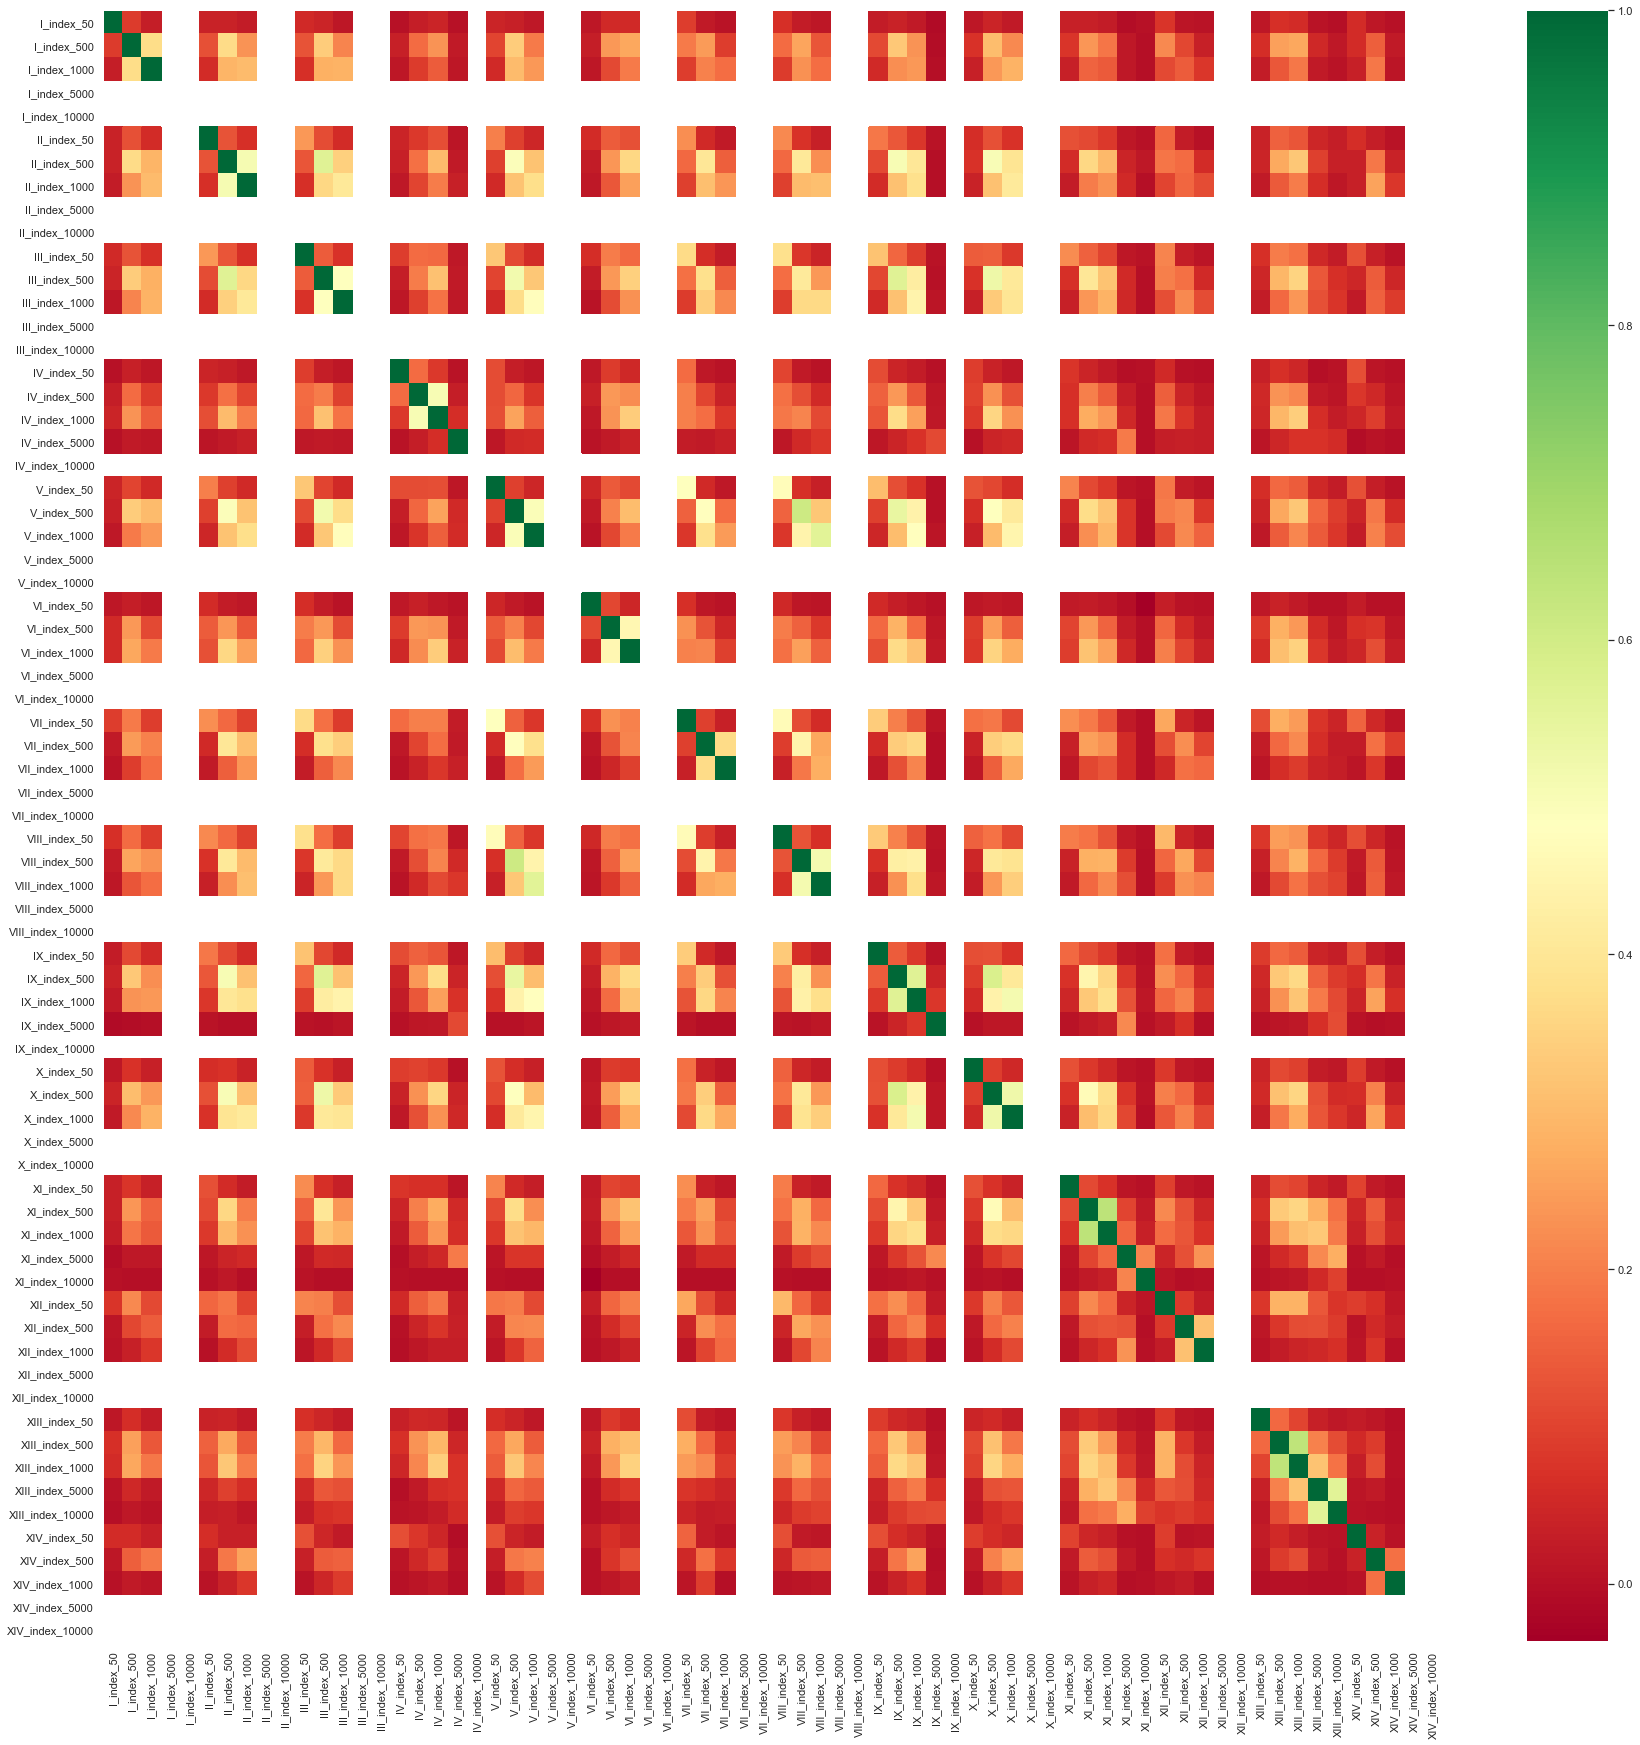

In [24]:
# sns.set_context('notebook')
# plt.figure(figsize=(30,30))
# sns.heatmap(temp1.corr(),annot=False,cmap='RdYlGn')

In [99]:
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib import cm

In [112]:
# fig = plt.figure(figsize=(15,15))
# ax = fig.add_subplot(111, projection='3d')
# x = list(trying['lon'])
# y = list(trying['lat'])
# z = list(trying['total_price'])
# ax.scatter(x, y, z, c='r', marker='o')

# Principle Component Analysis (PCA)

### 1. Standardize:

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

In [36]:
scaler.fit(train_NoRome_NoId)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [37]:
scaled_train_NoRome_NoId = scaler.transform(train_NoRome_NoId)

### 2. PCA:

In [38]:
from sklearn.decomposition import PCA

In [39]:
pca = PCA(n_components=3)

In [40]:
pca.fit(scaled_train_NoRome_NoId)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [41]:
x_pca = pca.transform(scaled_train_NoRome_NoId)

In [42]:
print(scaled_train_NoRome_NoId.shape)
print(x_pca.shape)

(58858, 34)
(58858, 3)


Text(0, 0.5, 'Second Principle Component')

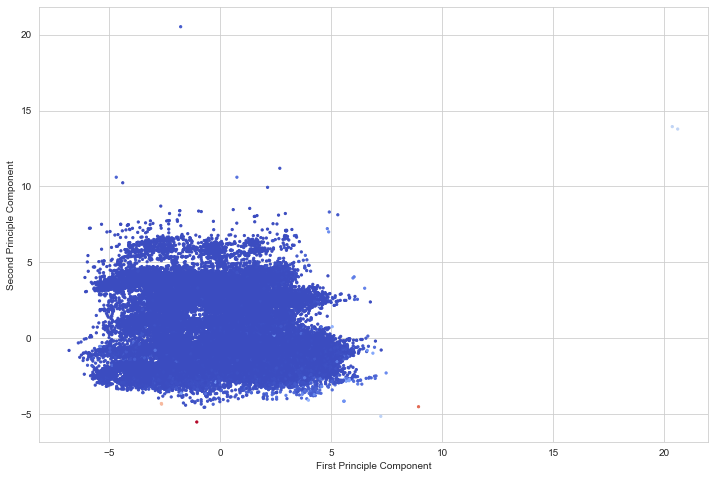

In [43]:
plt.figure(figsize=(12,8))
plt.scatter(x_pca[:,0],x_pca[:,1],s=5,c=train_NoRome_NoId['total_price'],cmap='coolwarm')
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')

In [44]:
# pd.DataFrame(x_pca).iplot(kind='surface')

In [45]:
pca.components_

array([[ 0.20634048, -0.03431659, -0.01983746,  0.25677557, -0.10077668,
         0.04495339,  0.37964668, -0.22652254,  0.01438313,  0.17412655,
        -0.01405699,  0.0663298 ,  0.0418941 ,  0.01842798, -0.0005386 ,
         0.108851  , -0.02194391,  0.0659593 , -0.07499327,  0.01079304,
        -0.0469498 ,  0.05905046,  0.09220058, -0.00295646,  0.03922444,
        -0.37682337,  0.01407714,  0.0727757 ,  0.37964787,  0.3795898 ,
        -0.12782678, -0.08654572,  0.08233924,  0.37496304],
       [-0.07367392,  0.20464845, -0.00715133, -0.12281359,  0.22201362,
        -0.04895532,  0.05777127,  0.08317343, -0.08056074,  0.03159056,
         0.13385965,  0.04277089,  0.10193562, -0.36308334, -0.37943197,
        -0.11828883, -0.21963306,  0.05014369, -0.19595558, -0.25590442,
         0.34886466, -0.28310127, -0.00440346, -0.00893492, -0.04687759,
        -0.05802283,  0.00068175,  0.01840801,  0.05777493,  0.05781641,
         0.22559955, -0.24657853,  0.2541393 ,  0.05234433],
  

In [46]:
df_comp = pd.DataFrame(pca.components_,columns=train_NoRome_NoId.columns)
df_comp

,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_price,txn_floor,...,total_price,building_age,inverse_building_age_sq,parking_price_expand,building_complete_month,building_complete_year,relative_floor,high_edu,low_edu,building_complete_range
0,0.206340,-0.034317,-0.019837,0.256776,-0.100777,0.044953,0.379647,-0.226523,0.014383,0.174127,...,0.039224,-0.376823,0.014077,0.072776,0.379648,0.379590,-0.127827,-0.086546,0.082339,0.374963
1,-0.073674,0.204648,-0.007151,-0.122814,0.222014,-0.048955,0.057771,0.083173,-0.080561,0.031591,...,-0.046878,-0.058023,0.000682,0.018408,0.057775,0.057816,0.225600,-0.246579,0.254139,0.052344
2,0.090227,0.262338,0.007259,0.022312,0.002701,0.054953,0.026057,-0.013986,0.224347,0.001853,...,0.249926,-0.024442,0.019505,0.253810,0.026045,0.025963,-0.049076,0.371854,-0.371647,0.035679


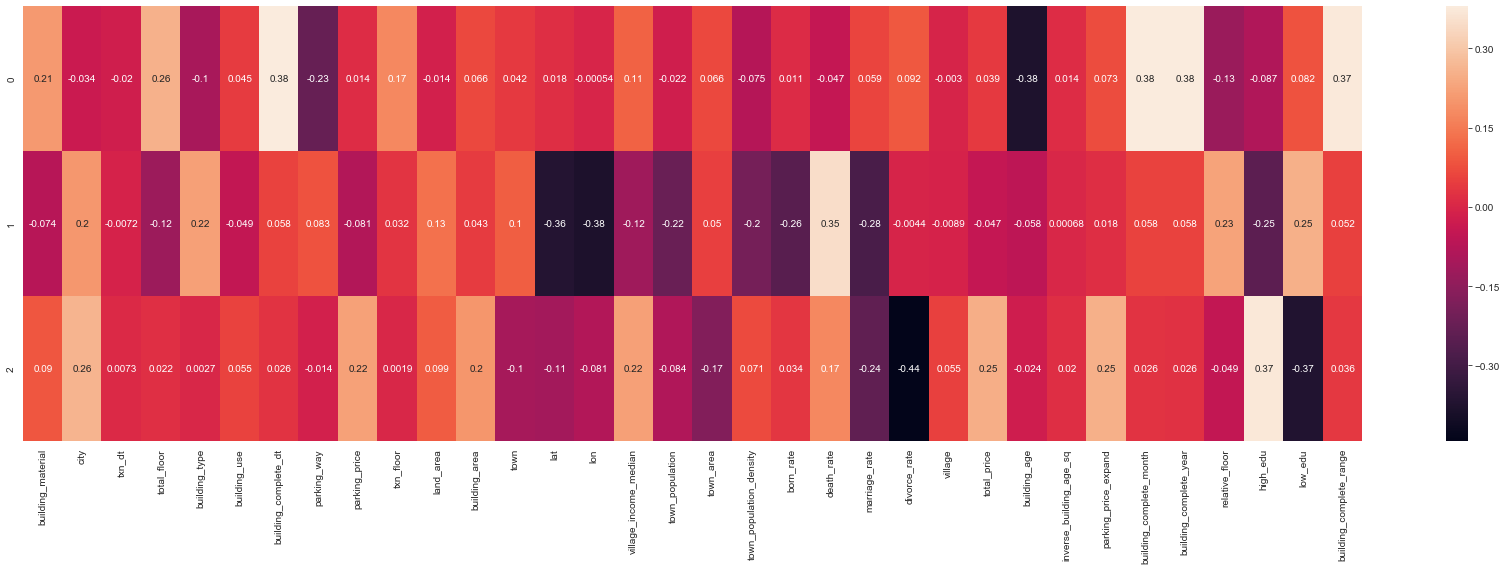

In [47]:
plt.figure(figsize=(30,8))
sns.heatmap(df_comp,annot=True)